# Titanic Analysis

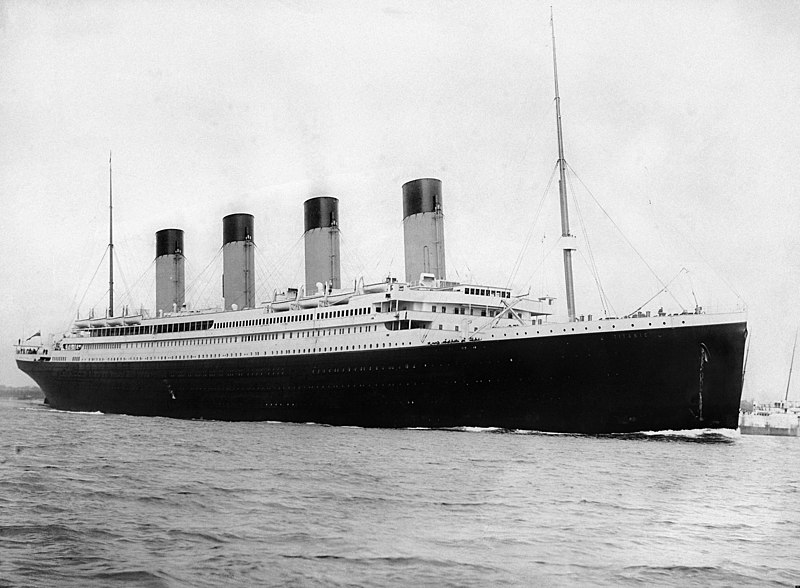

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#include dataset

In [3]:
data=sns.load_dataset("titanic")

In [4]:
#I will process the copy of the data set while preserving the original data.

In [5]:
df=data.copy()

In [6]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [7]:
#columns of the data set

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
#information about columns

In [10]:
#survived: Survival status (0 = Did not survive, 1 = Survived)
#pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
#sex: Gender (male or female)
#age: age
#sibsp: Number of siblings/spouses on Titanic
#parch: number of parents/children aboard the Titanic
#fare: Fee paid
#embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
#class: Passenger class
#who: Categorized gender of the passenger (man, woman, child)
#adult_male: Whether the passenger is an adult male (True or False)
#deck: Cabin number
#embark_town: Embarkation port
#alone: Whether the passenger is traveling alone (True or False)

In [11]:
#General information about the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Univariate Data Analysis

### 1-)Categorical Variable Analysis

In [13]:
#Basic statistical information

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [15]:
#statistical information for categorical columns

In [16]:
df.describe(include=["O"]).T

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
who,891,3,man,537
embark_town,889,3,Southampton,644
alive,891,2,no,549


In [17]:
#A function for analyzing categorical data

In [18]:
def categoryFunc(df_,columns_name):
    counts=df_[columns_name].value_counts()
    print("Value Counts:")
    print(counts)
    sns.countplot(x=columns_name, data=df_)
    plt.show()

In [19]:
c_list=["survived","pclass","sex","sibsp","parch","embarked","class"]

Value Counts:
survived
0    549
1    342
Name: count, dtype: int64


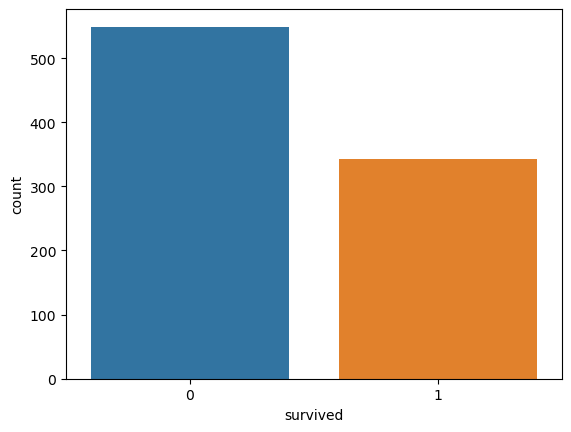

Value Counts:
pclass
3    491
1    216
2    184
Name: count, dtype: int64


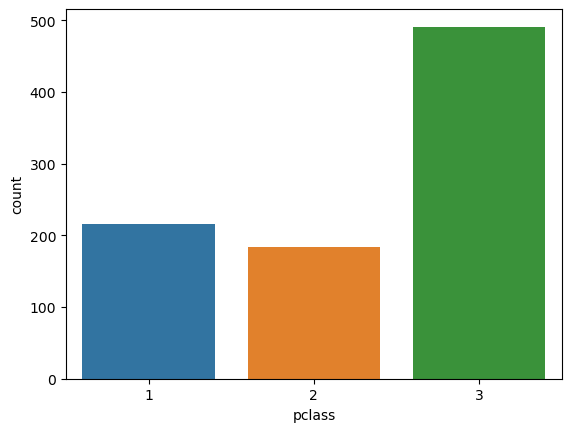

Value Counts:
sex
male      577
female    314
Name: count, dtype: int64


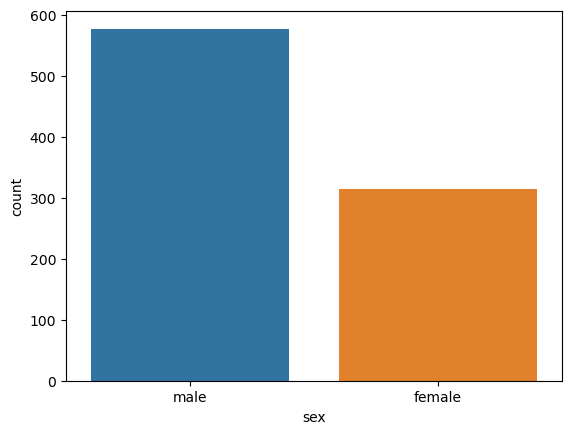

Value Counts:
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


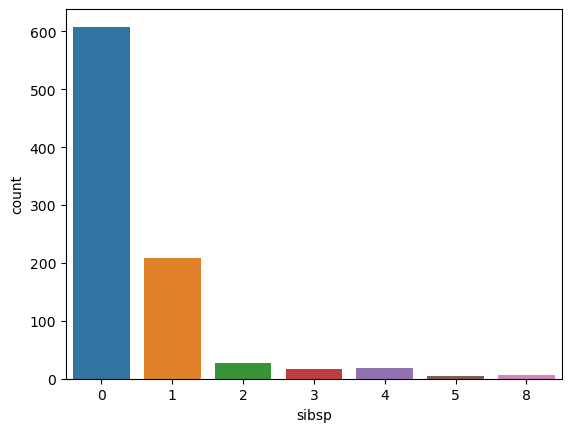

Value Counts:
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


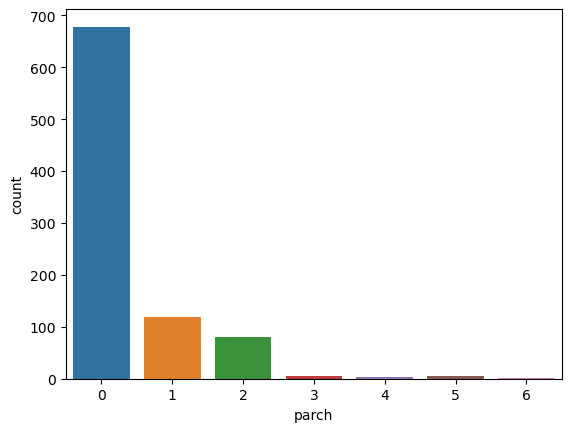

Value Counts:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


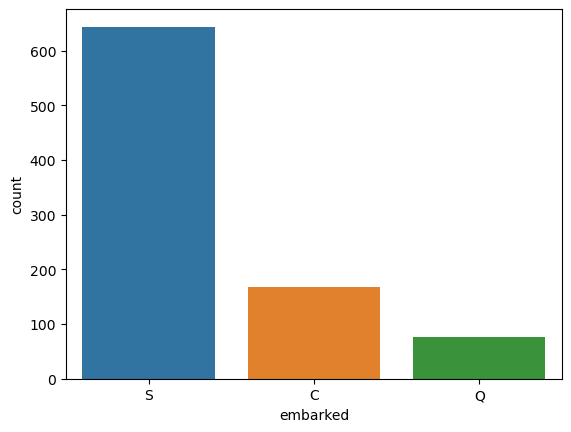

Value Counts:
class
Third     491
First     216
Second    184
Name: count, dtype: int64


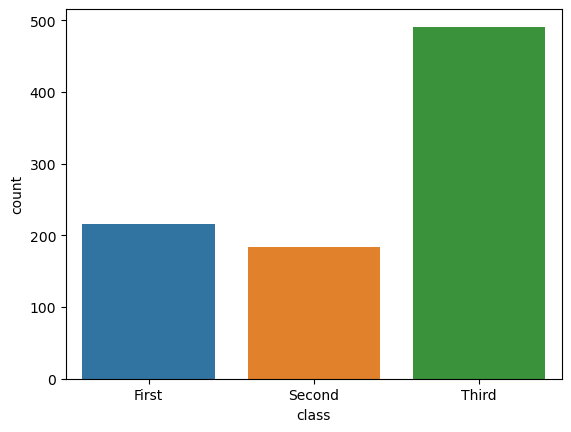

In [20]:
for i in c_list:
    categoryFunc(df,i)

### 2-)Numerical Variable Analysis

In [21]:
#A function for analyzing numerical data

In [22]:
def c(df_,column_name):
    sns.histplot(x=df_[column_name], bins=20, data=df_)
    plt.title("{} distribution".format(column_name))
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()

In [23]:
n_list=["age","fare","sibsp","pclass"]

In [24]:
for i in n_list:
    numericalFunc(df,i)

NameError: name 'numericalFunc' is not defined

# Multivariate analysis

## 1-)The effect of categorical variables on the dependent variable

    Examining the effect of categorical variables on the dependent variable helps us understand the relationship
between variables.

    Determining the impact of categorical variables on the dependent variable is important when building machine 
learning models and making predictions. These analyzes can help improve the model's accuracy and make better predictions.

In [ ]:
#A function for analyzing categorical variables

In [ ]:
def categoricalAnaliz(d):
    print("Analyzing:")
    print("Mean:\n",df.groupby(d)["survived"].mean())
    sns.barplot(x=d,y="survived",data=df)
    plt.show()

In [ ]:
listCate=["pclass","parch","sex","sibsp"]

In [ ]:
#The effect of categorical variables on the dependent variable

In [ ]:
for i in listCate:
    categoricalAnaliz(i)

In [ ]:
df[(df["sex"]=="male")&(df["pclass"]==1)]["survived"].mean()

## 2-)The effect of numerical variables on the dependent variable

In [ ]:
#Visualization of the relationship between survival status and age

In [ ]:
sns.jointplot(x="age",y="survived",data=df)

In [ ]:
#There are no deaths between the ages of 65-75

In [ ]:
sns.jointplot(x="age",y="survived",data=df,kind="reg")

In [ ]:
#By visualizing the relationship between survival and age and commenting on density, we can understand in which age 
#range there were more deaths.

In [ ]:
sns.jointplot(x="age",y="survived",data=df,kind="hex")

In [ ]:
#The death rate is very high in the 20-30 age range

In [25]:
#Survival rate of men traveling in 1st class

In [26]:
df[(df["sex"]=="male")&(df["pclass"]==1)]["survived"].mean()

0.36885245901639346

In [27]:
#survival rate of all male passengers

In [28]:
df[(df["sex"]=="male")]["survived"].mean()

0.18890814558058924

We see that 1st class has a higher overall survival rate among male passengers than the overall survival rate.

In [29]:
#correlation matrix between numerical columns

In [30]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()


In [31]:
correlation_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


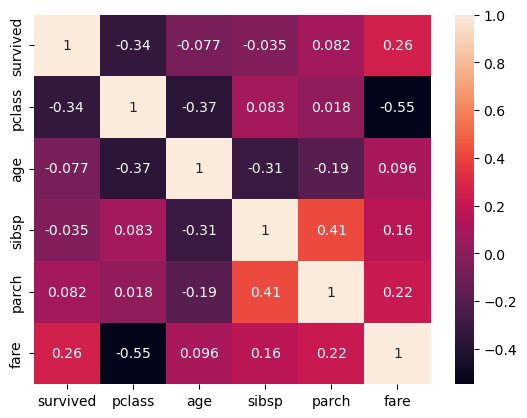

In [32]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

By visualizing the correlation matrix with the help of a heat map, we can more easily interpret the relationships between multiple variables in the data set.

C:\Users\Mestan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


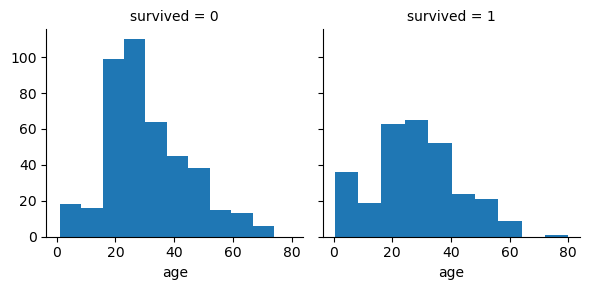

In [33]:
g = sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age')

### Subplots showing age distribution for each passenger class and survival status combination

C:\Users\Mestan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


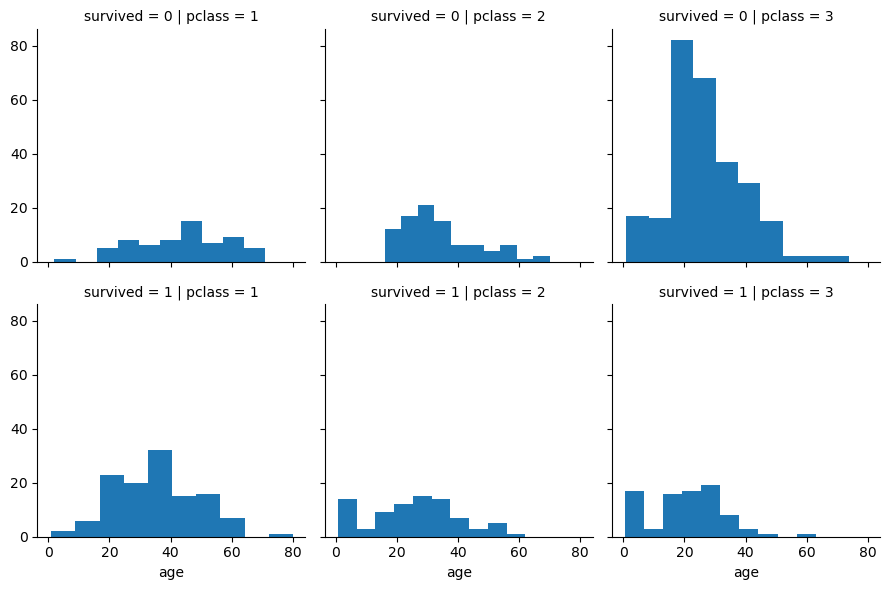

In [34]:
g = sns.FacetGrid(df, col='pclass',row="survived")
g.map(plt.hist, 'age',bins=10)

C:\Users\Mestan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


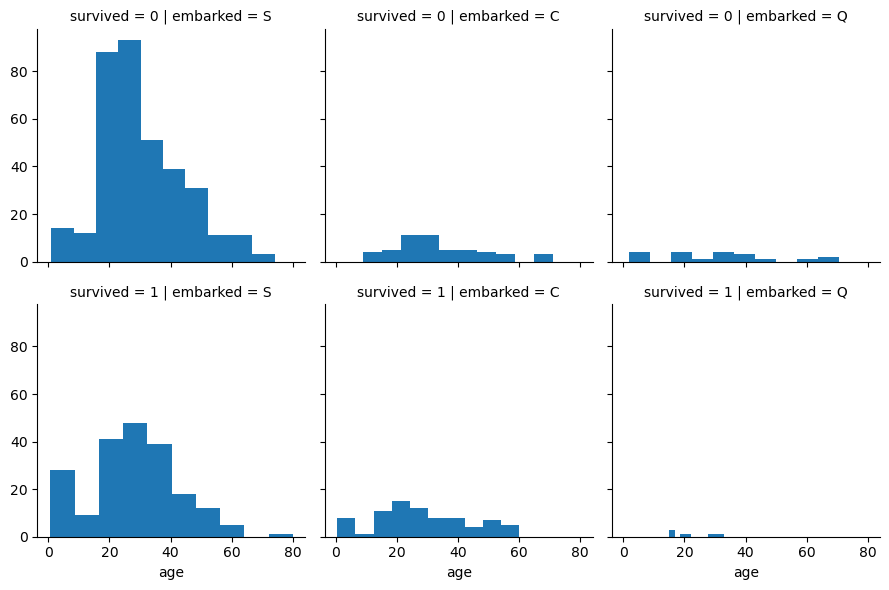

In [35]:
g = sns.FacetGrid(df, col='embarked',row="survived")
g.map(plt.hist, 'age',bins=10)

C:\Users\Mestan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Mestan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


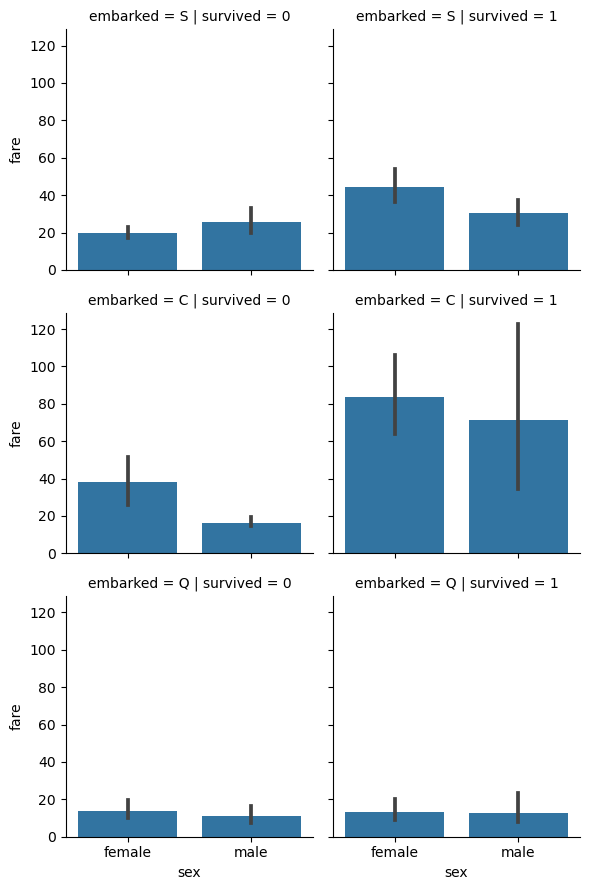

In [36]:
g = sns.FacetGrid(df, row='embarked',col="survived")
g.map(sns.barplot, 'sex','fare')

# Outlier Detection

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [38]:
#A function to identify and monitor outliers

In [39]:
def outlierFunc(d):
    print("variable examined = {}".format(d))
    sns.boxplot(df[d])
    plt.show()
    

In [40]:
list_=["fare","parch","age","sibsp"]

variable examined = fare


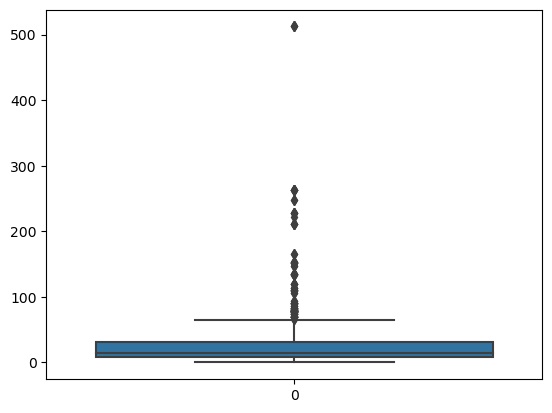

variable examined = parch


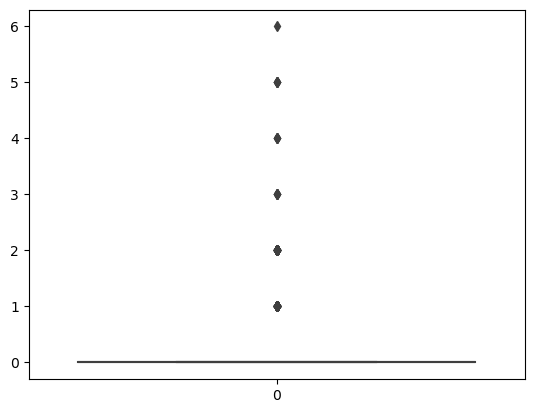

variable examined = age


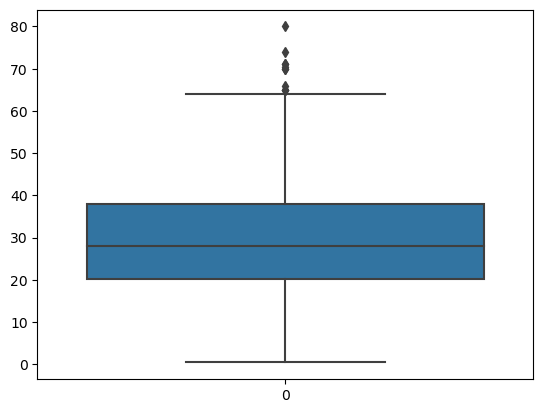

variable examined = sibsp


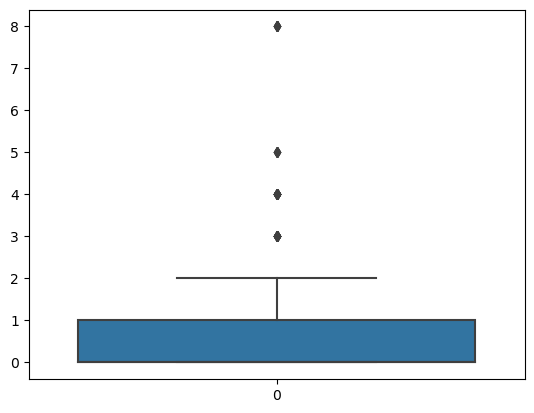

In [41]:
for i in list_:
    outlierFunc(i)

In [42]:
#Function that removes outliers from the data set

In [43]:
def drop_outliers(df_, column):
    q1 = df_[column].quantile(0.25)
    q3 = df_[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_index = df_.loc[(df_[column] < lower_bound) | (df_[column] > upper_bound)].index
    clean_df = df_.drop(outliers_index)
    return clean_df


In [44]:
clean_df = df.copy() 
for i in list_:
    drop_outliers(clean_df,i)

In [45]:
clean_df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
#columns with missing values

In [47]:
columns_with_missing_values = clean_df.columns[df.isnull().any()]
print(columns_with_missing_values)


Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')


In [48]:
#Let's figure out in which rows the missing values are and how many there are.

In [49]:
clean_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Let's fill in the missing values in the embarked, age columns.

In [50]:
#Using more than one point as reference when filling in missing values will help you perform a more accurate process.

In [51]:
#We fill the ports where we board the ship

In [52]:
clean_df[clean_df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [53]:
#We will use more than one point as reference while filling.

In [54]:
#Let's deal with the embarked and the fare first 

<Axes: xlabel='embarked', ylabel='fare'>

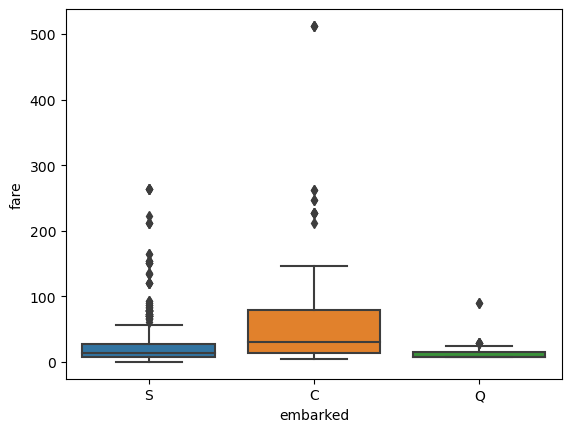

In [55]:
sns.boxplot(x="embarked",y="fare",data=clean_df)

<Axes: xlabel='embarked', ylabel='fare'>

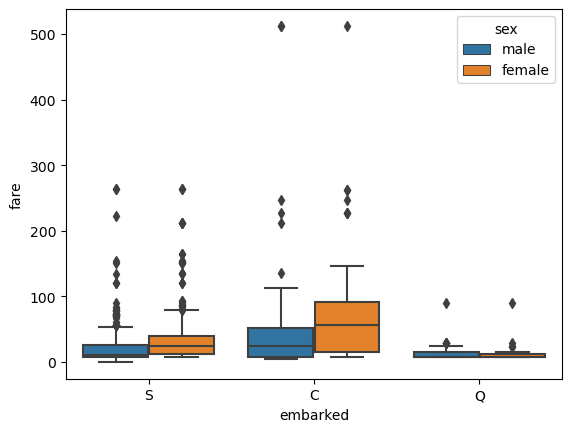

In [56]:
sns.boxplot(x="embarked",y="fare",hue="sex",data=clean_df)

In [57]:
#The ports they boarded in and their gender give us information.

In [58]:
#Those who pay the most are women and those boarding at Cherbourg port

In [59]:
#we will look at the money they paid to fill the missing places and their classes.

In [60]:
clean_df[clean_df["embarked"].isnull()]["fare"]

61     80.0
829    80.0
Name: fare, dtype: float64

In [61]:
clean_df[clean_df["embarked"].isnull()]["pclass"]

61     1
829    1
Name: pclass, dtype: int64

In [62]:
clean_df.groupby(["embarked","sex"])[["pclass","fare"]].mean()

pclass       fare
embarked sex                        
C        female  1.726027  75.169805
         male    2.010526  48.262109
Q        female  2.888889  12.634958
         male    2.926829  13.838922
S        female  2.197044  38.740929
         male    2.421769  21.711996

In [63]:
#The port with the closest values to ours Cherbourg

In [64]:
clean_df["embarked"].fillna("C",inplace=True)

In [65]:
clean_df[clean_df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [66]:
#we are filling the age

In [67]:
clean_df[clean_df["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [68]:
#Let's find out which variables to use as references.

<Axes: xlabel='pclass', ylabel='age'>

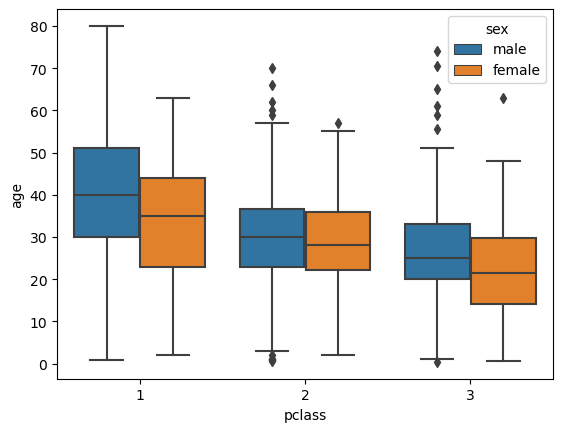

In [69]:
sns.boxplot(x="pclass",y="age",hue="sex",data=clean_df)

<Axes: xlabel='embarked', ylabel='age'>

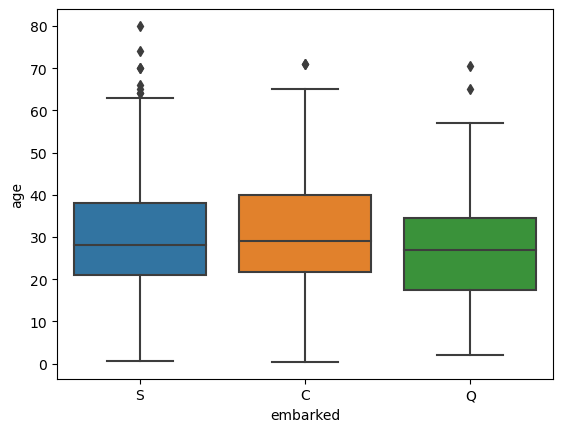

In [70]:
sns.boxplot(x="embarked",y="age",data=clean_df)

<Axes: xlabel='alive', ylabel='age'>

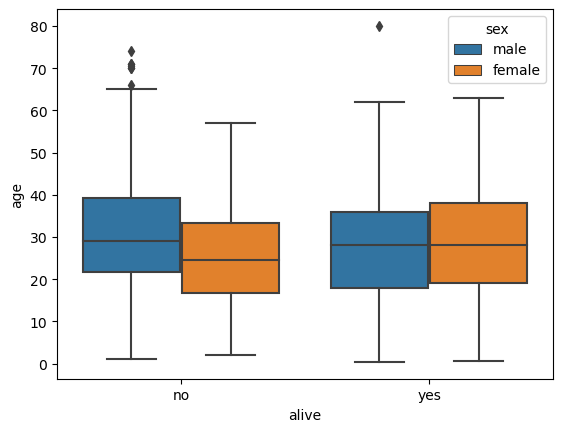

In [71]:
sns.boxplot(x="alive",y="age",hue="sex",data=clean_df)

<Axes: xlabel='sibsp', ylabel='age'>

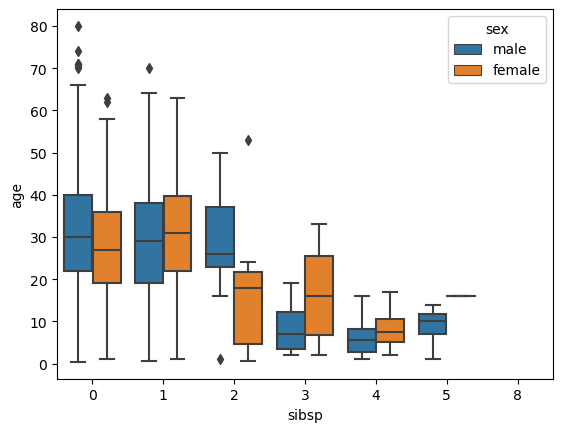

In [72]:
sns.boxplot(x="sibsp",y="age",hue="sex",data=clean_df)

In [108]:
index_list = list(clean_df[clean_df["age"].isnull()].index)
clean_df_copy = clean_df.copy()

In [123]:
for i in index_list:
    
    fill_age = clean_df[(clean_df["sibsp"] == clean_df["sibsp"].iloc[i]) & 
               (clean_df["alive"] == clean_df["alive"].iloc[i])&
               (clean_df["parch"] == clean_df["parch"].iloc[i])&         
               (clean_df["pclass"] == clean_df["pclass"].iloc[i])]["age"].mean()
    
 
        
    clean_df_copy["age"].iloc[i] = fill_age

In [121]:
clean_df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,15.904557,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [116]:
clean_df_copy[clean_df_copy["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
